In [1]:
library(ggplot2)
library(data.table)
library(viridis)
library(dplyr)
library(RColorBrewer)
library(scales)

library(egg)
library(grid)

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Metadata color schemes:
https://docs.google.com/document/d/1aoHiYCidordBpsvrk81forVNbjq4PPanLEfFkQs2knA/edit


# Load megagut metadata

In [2]:
# Metadata from Amanda, cells
meta = fread("/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy.no_doublets.annot_all_levels.updated_donorID.20230126.metadata_update.20230421.csv")

In [3]:
dim(meta)

[1] 1077241     123

In [4]:
colnames(meta)

[1] "index"                       "latent_cell_probability"    
  [3] "latent_RT_efficiency"        "cecilia22_predH"            
  [5] "cecilia22_predH_prob"        "cecilia22_predH_uncertain"  
  [7] "cecilia22_predL"             "cecilia22_predL_prob"       
  [9] "cecilia22_predL_uncertain"   "elmentaite21_pred"          
 [11] "elmentaite21_pred_prob"      "elmentaite21_pred_uncertain"
 [13] "suo22_pred"                  "suo22_pred_prob"            
 [15] "suo22_pred_uncertain"        "n_counts"                   
 [17] "log1p_n_counts"              "n_genes"                    
 [19] "log1p_n_genes"               "percent_mito"               
 [21] "n_counts_mito"               "percent_ribo"               
 [23] "n_counts_ribo"               "percent_hb"                 
 [25] "n_counts_hb"                 "percent_top50"              
 [27] "n_counts_raw"                "log1p_n_counts_raw"         
 [29] "n_genes_raw"                 "log1p_n_genes_raw"          
 [31] "percent_mito_raw"            "n_counts_mito_raw"          
 [33] "percent_ribo_raw"            "n_counts_ribo_raw"          
 [35] "percent_hb_raw"              "n_counts_hb_raw"            
 [37] "percent_top50_raw"           "n_counts_spliced"           
 [39] "log1p_n_counts_spliced"      "n_genes_spliced"            
 [41] "log1p_n_genes_spliced"       "percent_mito_spliced"       
 [43] "n_counts_mito_spliced"       "percent_ribo_spliced"       
 [45] "n_counts_ribo_spliced"       "percent_hb_spliced"         
 [47] "n_counts_hb_spliced"         "percent_top50_spliced"      
 [49] "n_counts_unspliced"          "log1p_n_counts_unspliced"   
 [51] "n_genes_unspliced"           "log1p_n_genes_unspliced"    
 [53] "percent_mito_unspliced"      "n_counts_mito_unspliced"    
 [55] "percent_ribo_unspliced"      "n_counts_ribo_unspliced"    
 [57] "percent_hb_unspliced"        "n_counts_hb_unspliced"      
 [59] "percent_top50_unspliced"     "percent_soup"               
 [61] "percent_spliced"             "qc_cluster"                 
 [63] "pass_auto_filter_mito20"     "good_qc_cluster_mito20"     
 [65] "pass_auto_filter_mito50"     "good_qc_cluster_mito50"     
 [67] "pass_auto_filter_mito80"     "good_qc_cluster_mito80"     
 [69] "pass_auto_filter"            "good_qc_cluster"            
 [71] "pass_default"                "sampleID"                   
 [73] "sourceID"                    "donorID_original"           
 [75] "study"                       "donorID_corrected"          
 [77] "donorID_unified"             "donor_category"             
 [79] "donor_disease"               "organ_original"             
 [81] "organ_unified"               "organ_broad"                
 [83] "age_original"                "age_unified"                
 [85] "age_continuousadult"         "age_continuousdev"          
 [87] "sex"                         "sample_type"                
 [89] "sample_category"             "sample_retrieval"           
 [91] "tissue_fraction"             "cell_fraction"              
 [93] "cell_fraction_unified"       "cell_sorting"               
 [95] "technology"                  "include_150722"             
 [97] "cluster_scrublet_score"      "bh_pval"                    
 [99] "scrublet_score"              "scrublet_score_z"           
[101] "scrublet_done"               "doublet"                    
[103] "stringent_doublet"           "integration_grouping"       
[105] "_scvi_batch"                 "_scvi_labels"               
[107] "broad_annot_20220914"        "martin19_pred"              
[109] "martin19_pred_prob"          "martin19_pred_uncertain"    
[111] "warner20_pred"               "warner20_pred_prob"         
[113] "warner20_pred_uncertain"     "broad_annot_20220917"       
[115] "donor_organ_lineage"         "fine_annot"                 
[117] "fine_annot_original"         "level_1_annot"              
[119] "level_2_annot"               "level_3_annot"              
[121] "organ_groups"                "disea

In [5]:
table(meta$disease)


               control                inutero    neighbouring_cancer 
                489029                 333624                 152292 
neighbouring_inflammed    neighbouring_polyps                preterm 
                 77136                  15648                   9512 

In [6]:
table(meta$organ_unified, useNA="always")


        appendix  ascending colon    buccal mucosa           caecum 
            2199            21724            28724            18371 
           colon descending colon         duodenum  gingival mucosa 
          156256             5581           144244            42813 
           ileum        intestine          jejunum              MLN 
          214737             2151            12199            35312 
      oesophagus     periodontium           rectum   salivary gland 
          116866             1975            18950            24094 
   sigmoid colon  small intestine          stomach       transverse 
           28503            29473           143803            29266 
            <NA> 
               0 

In [7]:
table(meta$age_unified)


                       14-20_second_trimester                  18-34 
                 43799                 158426                 154378 
         23-31_preterm                  35-54                    4-7 
                  9512                 178461                  28729 
                 47-80                  55-74   6-13_first_trimester 
                 19393                 257745                 175198 
                   75+                   9-12 
                 28264                  23336 

In [8]:
# Group ages into smaller 
meta$age_groups = recode(
    meta$age_unified,
    '47-80'='Adult',
    '18-34'='Adult',
    '55-74'='Adult',
    '35-54'='Adult',
    '9-12'='Pediatric',
    '6-13_first_trimester'='Embryo/fetal',
    '4-7'='Pediatric',
    '14-20_second_trimester'='Embryo/fetal',
    '75+'='Adult',
    '23-31_preterm'='Preterm',
    '13-17'='Pediatric'
)
table(meta$age_groups)


                    Adult Embryo/fetal    Pediatric      Preterm 
       43799       638241       333624        52065         9512 

In [9]:
table(meta$organ_unified)


        appendix  ascending colon    buccal mucosa           caecum 
            2199            21724            28724            18371 
           colon descending colon         duodenum  gingival mucosa 
          156256             5581           144244            42813 
           ileum        intestine          jejunum              MLN 
          214737             2151            12199            35312 
      oesophagus     periodontium           rectum   salivary gland 
          116866             1975            18950            24094 
   sigmoid colon  small intestine          stomach       transverse 
           28503            29473           143803            29266 

In [10]:
# Clean metadata

# Relable "transverse" => "transverse colon"
meta$organ_unified[meta$organ_unified == "transverse"] = "transverse colon"

#meta$age_unified[meta$age_unified == ""] = NA

In [11]:
table(meta$level_3_annot)


               Angiogenic_pericyte                             B_GC_I 
                               849                               3573 
                           B_GC_II                           B_memory 
                              3499                              33026 
                           B_naive                      B_plasma_IgA1 
                             36366                              54360 
                     B_plasma_IgA2                       B_plasma_IgG 
                              4888                               7033 
                      B_plasma_IgM                      B_plasmablast 
                              4922                                465 
                            B_preB                             B_proB 
                               676                                432 
                             Basal                      Basal_cycling 
                             13722                               2252 
     

In [12]:
length(table(meta$level_3_annot))

[1] 136

In [13]:
# Subset data frame for columns to visualize
select_columns = c("index", "disease", "organ_unified", "study", "donorID_unified", "age_groups")
meta_sub = meta[, ..select_columns]  # .. is data.table expansion of variable 

In [14]:
head(meta_sub)

index,disease,organ_unified,study,donorID_unified,age_groups
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACGAATCTCTTGCG-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult
AAACGCTAGCGACCCT-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult
AAAGAACAGCGACCCT-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult
AAAGGGCAGTCACACT-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult
AAAGGGCCAACACAGG-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult
AAAGTCCGTCGAAGCA-GSM4600896,control,gingival mucosa,Caetano2021,D61,Adult


In [15]:
#sort(table(meta_sub$disease))

In [16]:
#sort(table(meta_sub$organ_unified))

In [17]:
#sort(table(meta_sub$study))

# Count cells and donors per condition
Condition: disease x organ_unified x study

In [18]:
# Count cells per group in selected features of meta_sub
#d_counts = aggregate(index~disease + organ_unified + study + donorID_unified + age_unified, data=d, FUN=length)
d_cell_counts = aggregate(index~., data=meta_sub, FUN=length)

setnames(d_cell_counts, "index", "n_cells")  # rename cell counts column

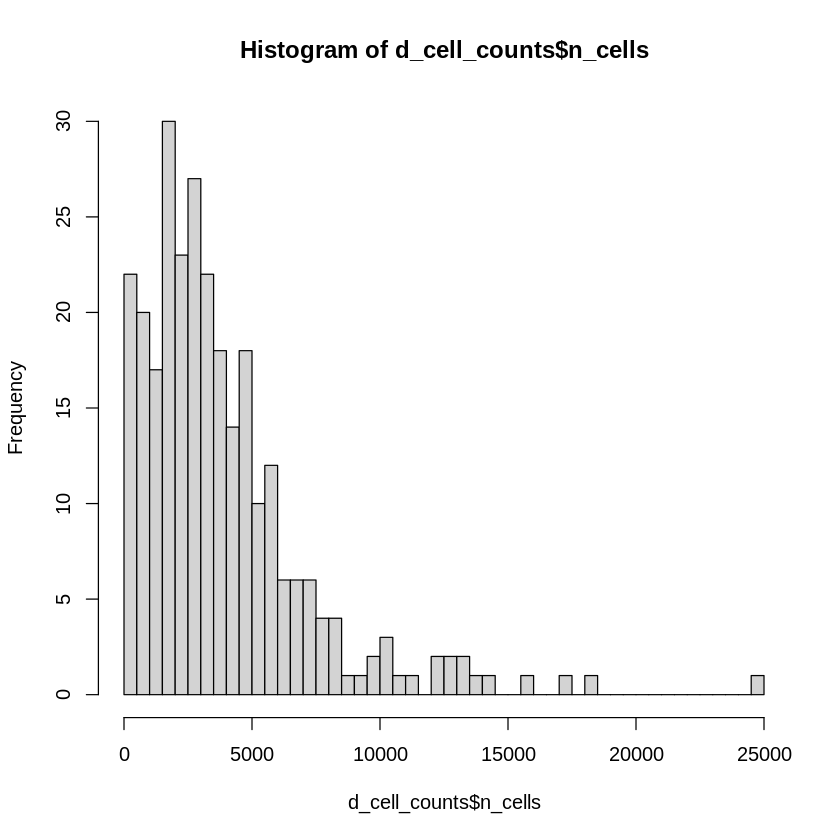

In [19]:
hist(d_cell_counts$n_cells, breaks=50)

In [20]:
head(d_cell_counts)

,disease,organ_unified,study,donorID_unified,age_groups,n_cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,neighbouring_inflammed,colon,Jaeger2021,D142,,12179
2,neighbouring_inflammed,ileum,Martin2019,D39,,4727
3,neighbouring_inflammed,ileum,Martin2019,D40,,2117
4,neighbouring_inflammed,ileum,Martin2019,D41,,1855
5,neighbouring_inflammed,ileum,Martin2019,D42,,2990
6,neighbouring_inflammed,ileum,Martin2019,D43,,4124


In [21]:
# Count donor sample sizes per condition (organ x study x disease)
d_donor_counts = aggregate(donorID_unified ~ organ_unified + study + age_groups, data=d_cell_counts, FUN=length)

setnames(d_donor_counts, "donorID_unified", "n_donor")

In [23]:
# Sum cell count per organ x study x disease
d_condition = aggregate(n_cells ~ organ_unified + study + age_groups, data=d_cell_counts, FUN=sum)

In [24]:
# Collect cell and donor counts per organ x study x disease
d_condition = merge(d_donor_counts, d_condition)
head(d_condition)

,organ_unified,study,age_groups,n_donor,n_cells
,<chr>,<chr>,<chr>,<int>,<int>
1,appendix,Elmentaite2021,Adult,5,2199
2,ascending colon,Elmentaite2021,Adult,5,13398
3,ascending colon,Lee2020,Adult,1,2700
4,ascending colon,Wang2020,Adult,2,5626
5,buccal mucosa,Williams2021,Adult,8,28724
6,caecum,Dominguez2022,Adult,3,1491


In [25]:
table(meta$organ_unified)


        appendix  ascending colon    buccal mucosa           caecum 
            2199            21724            28724            18371 
           colon descending colon         duodenum  gingival mucosa 
          156256             5581           144244            42813 
           ileum        intestine          jejunum              MLN 
          214737             2151            12199            35312 
      oesophagus     periodontium           rectum   salivary gland 
          116866             1975            18950            24094 
   sigmoid colon  small intestine          stomach transverse colon 
           28503            29473           143803            29266 

In [26]:
table(meta$age_unified)


                       14-20_second_trimester                  18-34 
                 43799                 158426                 154378 
         23-31_preterm                  35-54                    4-7 
                  9512                 178461                  28729 
                 47-80                  55-74   6-13_first_trimester 
                 19393                 257745                 175198 
                   75+                   9-12 
                 28264                  23336 

# Plot tabular counts

In [27]:
unique(meta_sub$organ_unified)

[1] "gingival mucosa"  "stomach"          "duodenum"         "ileum"           
 [5] "salivary gland"   "caecum"           "colon"            "MLN"             
 [9] "ascending colon"  "transverse colon" "descending colon" "sigmoid colon"   
[13] "rectum"           "appendix"         "jejunum"          "oesophagus"      
[17] "small intestine"  "intestine"        "periodontium"     "buccal mucosa"

In [28]:
unique(meta_sub$disease)

[1] "control"                "neighbouring_cancer"    "inutero"               
[4] "neighbouring_polyps"    "neighbouring_inflammed" "preterm"

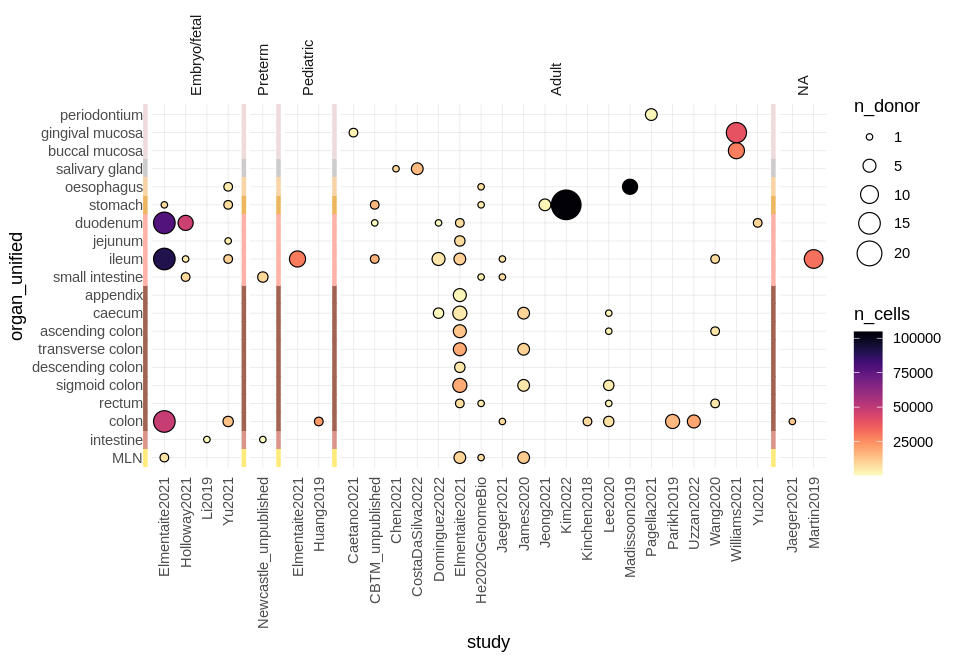

In [39]:
# Dotplot  of cell counts and donor counts per organ x study x disease
width = 8
height = 5.5
options(repr.plot.width=width, repr.plot.height=height)

# Copy
d = d_condition

# Color schemes

# Organ colors used for UMAPs
# organ_colors = c(
#     'periodontium'='#f4e7e7',
#     'gingival mucosa'='#eedbdb',
#     'buccal mucosa'='#e3c9c9',
#     'salivary gland'='#cecbcb',
#     'oesophagus'='#f9d4a7',
#     'stomach'='#edb75f',
#     'duodenum'='#fec8c1',
#     'jejunum'='#feb2a8',
#     'ileum'='#fc9a8d',
#     'appendix'='#debcb4',
#     'caecum'='#deb0a4',
#     'ascending colon'='#cf9686',
#     'transverse colon'='#bd7c68',
#     'descending colon'='#a36352',
#     'sigmoid colon'='#874533',
#     'rectum'='#522e25',
#     'small intestine'='#f5a59a',
#     'intestine'='#db948a',
#     'colon'='#c28e80',
#     'MLN'='#ffeb7a'
# )

# Grouped colors
organ_colors = c(
    'periodontium'= '#eedbdb',
    'gingival mucosa'= '#eedbdb',
    'buccal mucosa'= '#eedbdb',
    'salivary gland'= '#cecbcb',
    'oesophagus'= '#f9d4a7',
    'stomach'= '#edb75f',
    'duodenum'= '#feb2a8',
    'jejunum'= '#feb2a8',
    'ileum'= '#feb2a8',
    'small intestine'= '#feb2a8',
    'appendix'= '#a36352',
    'caecum'= '#a36352',
    'ascending colon'= '#a36352',
    'transverse colon'= '#a36352',
    'descending colon'= '#a36352',
    'sigmoid colon'= '#a36352',
    'rectum'= '#a36352',
    'colon'= '#a36352',
    'intestine'= '#db948a',
    'MLN'= '#ffeb7a'
)

# # Organ order based on megagut metadata document
# organ_order = rev(c(                               
#     'periodontium',
#     'gingival mucosa',
#     'buccal mucosa',
#     'salivary gland',
#     'oesophagus',
#     'stomach',
#     'duodenum',
#     'jejunum',
#     'ileum',
#     'appendix',
#     'caecum',
#     'ascending colon',
#     'transverse colon',
#     'descending colon',
#     'sigmoid colon',
#     'rectum',
#     'small intestine',
#     'intestine',
#     'colon',
#     'MLN'
# ))

# Reordered organs, by Amanda
organ_order = rev(c(
    'periodontium',
    'gingival mucosa',
    'buccal mucosa',
    'salivary gland',
    'oesophagus',
    'stomach',
    'duodenum',
    'jejunum',
    'ileum',
    'small intestine',
    'appendix',
    'caecum',
    'ascending colon',
    'transverse colon',
    'descending colon',
    'sigmoid colon',
    'rectum',
    'colon',
    'intestine',
    'MLN'
))

age_order = c(
    'Embryo/fetal',
    'Preterm',
    'Pediatric',
    'Adult'
)

d$age_groups = factor(d$age_groups, levels=age_order)

# Match organ colors
organ_colors = organ_colors[match(names(organ_colors), organ_order)]

# Reorder organ levels
d$organ_unified = factor(
    d_condition$organ_unified,
    levels=organ_order
)

# Plot order for disease conditions by number of entries
#diseases = names(sort(table(d_condition$disease), decreasing=TRUE))

# diseases_order = c(
#     'control',
#     'inutero',
#     'preterm',
#     'crohns_disease',
#     'ulcerative_colitis',
#     'pediatric_IBD',                               
#     'neighbouring_inflammed',
#     'neighbouring_polyps',
#     'celiac_active',
#     'celiac_treated',
#     'cancer_colorectal',
#     'cancer_gastric',
#     'neighbouring_cancer'
# )

# Disease order with adjacent
diseases_order = c(
    'control',
    'neighbouring_inflammed',
    'neighbouring_polyps',
    'neighbouring_cancer',
    'inutero',
    'preterm',
    'crohns_disease',
    'ulcerative_colitis',
    'pediatric_IBD',                               
    'celiac_active',
    'celiac_treated',
    'cancer_colorectal',
    'cancer_gastric'
)

#d$disease = factor(d_condition$disease, levels=diseases_order)

#d = droplevels(d)  # drop empty levels in data.frame

# dotplot
g = ggplot(d, aes(x=study, y=organ_unified, size=n_donor, fill=n_cells)) +
    # Facets grid per disease condition, starting with controls 
    facet_grid(~age_groups,
               scales="free_x",
               space="free_x",
               #switch="x"
              ) +  # free_x drops empty columns, free_x scales x dimensions to number of entries

    # Points
    geom_point(pch=21) +

    # Scales
    #scale_color_gradientn(colors=turbo(20)) +
    scale_fill_gradientn(colors=rev(magma(20))) +
    scale_size_area(max_size=8, breaks=c(1, 5, 10, 15, 20)) +
    
    # Style
    coord_cartesian(clip="off") +  # allow plotting outside bounding box, preventing clipping
    theme_minimal() +
    theme(
        # Vertical x labels
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
        
        # Horizontal labels
        axis.text.y = element_text(
            #color=organ_colors
        ),
        
        # Vertical facets labels
        strip.text.x = element_text(angle=90, hjust=0),
        
        # Grid style
        panel.grid.major = element_line(
            color="grey90",
            linewidth=0.2
        ),
#         panel.grid.major.x = element_line(
#             color=alpha("grey80", 0.5),
#         ),
#         panel.grid.major.y = element_line(
#             color=alpha(organ_colors, 0.5),
#         ),
        panel.grid.minor = element_blank()  # no minor grid
    )
    

# Shared organ color legend annotation across facets groups
color_legend = ggplot(data.frame(id=1:length(organ_colors), group=names(organ_colors)), aes(y = id, x = 0, col=group)) +
    geom_point(shape = 15, size = 5, show.legend = FALSE) + 
    theme_classic() +
    scale_color_manual(values=alpha(organ_colors, 1.0)) +
    theme(
        axis.title = element_blank(), axis.line = element_blank(), 
        axis.text = element_blank(), axis.ticks = element_blank(), 
        plot.margin = unit(c(0, 0, 0, 0), "cm"))

g + annotation_custom(ggplotGrob(color_legend),
    xmin = 0,
    xmax = 0, 
    ymin = -0.2,
    ymax = length(organ_order) + 1
)

#g

ggsave("plots/megagut_metadata_visual_overview_healthy_v2.pdf", width=width, height=height)